# Importar Bibliotecas

In [ ]:
import duckdb
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra

# Conectar com o BD - DuckDB

In [7]:
# Conecta ao DuckDB
# Conecta abrindo / criando um arquivo
conexao = duckdb.connect('../dados/filme_duckdb.db')

In [9]:
query = 'SELECT * FROM filmes_imdb'
df = conexao.execute(query).fetchdf()
df

,id,Title,Movie Link,Year,Duration,MPA,Rating,Votes,budget,grossWorldWide,...,writers,stars,genres,countries_origin,filming_locations,production_companies,Languages,wins,nominations,oscars
0,tt0073195,Jaws,https://www.imdb.com/title/tt0073195,1975,2h 4m,PG,8.1,683K,7000000.0,477220580.0,...,"['Peter Benchley', 'Carl Gottlieb']","['Roy Scheider', 'Robert Shaw', 'Richard Dreyf...","['Monster Horror', 'Sea Adventure', 'Survival'...",['United States'],"[""Water Street, Edgartown, Martha's Vineyard, ...","['Zanuck/Brown Productions', 'Universal Pictur...",['English'],0,20,0
1,tt0073629,The Rocky Horror Picture Show,https://www.imdb.com/title/tt0073629,1975,1h 40m,R,7.4,173K,1200000.0,115798478.0,...,"[""Richard O'Brien"", 'Jim Sharman']","['Tim Curry', 'Susan Sarandon', 'Barry Bostwick']","['Dark Comedy', 'Raunchy Comedy', 'Rock Musica...","['United Kingdom', 'United States']","['Oakley Court, Windsor Road, Oakley Green, Wi...","['Twentieth Century Fox', 'Michael White Produ...",['English'],0,4,0
2,tt0073486,One Flew Over the Cuckoo's Nest,https://www.imdb.com/title/tt0073486,1975,2h 13m,R,8.7,1.1M,3000000.0,109115366.0,...,"['Lawrence Hauben', 'Bo Goldman', 'Ken Kesey']","['Jack Nicholson', 'Louise Fletcher', 'Michael...","['Medical Drama', 'Psychological Drama', 'Drama']",['United States'],['Oregon State Mental Hospital - 2600 Center S...,"['Fantasy Films', 'N.V. Zvaluw']",['English'],0,15,0
3,tt0072890,Dog Day Afternoon,https://www.imdb.com/title/tt0072890,1975,2h 5m,R,8.0,279K,1800000.0,50002721.0,...,"['Frank Pierson', 'P.F. Kluge', 'Thomas Moore']","['Al Pacino', 'John Cazale', 'Penelope Allen']","['Heist', 'True Crime', 'Biography', 'Crime', ...",['United States'],"['285 Prospect Park West, Brooklyn, New York C...","['Warner Bros.', 'Artists Entertainment Complex']",['English'],0,20,0
4,tt0073692,Shampoo,https://www.imdb.com/title/tt0073692,1975,1h 50m,R,6.4,15K,4000000.0,49407734.0,...,"['Robert Towne', 'Warren Beatty']","['Warren Beatty', 'Julie Christie', 'Goldie Ha...","['Satire', 'Comedy', 'Drama']",['United States'],"['2270 Bowmont Drive, Beverly Hills, Californi...","['Persky-Bright / Vista', 'Columbia Pictures',...",['English'],0,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33595,tt0094076,The South,https://www.imdb.com/title/tt0094076,1988,2h 7m,R,7.3,1.1K,NaN,NaN,...,['Fernando E. Solanas'],"['Susú Pecoraro', 'Miguel Ángel Solá', 'Philip...",['Drama'],"['Argentina', 'France']","['Buenos Aires, Federal District, Argentina']","['Canal+', 'Cinesur (Envar El Kadri)', 'Produc...","['Spanish', 'French']",0,2,0
33596,tt0256664,El cabaretero y sus golfas,https://www.imdb.com/title/tt0256664,1988,1h 25m,None,4.9,12,NaN,NaN,...,['Raúl Marcelo'],"['Raúl Ramírez', 'Raúl Marcelo', 'Marcela Davi...",['Comedy'],['Mexico'],None,None,['Spanish'],0,0,0
33597,tt0353261,BraveStarr: The Legend,https://www.imdb.com/title/tt0353261,1988,1h 31m,PG,6.8,1.3K,NaN,NaN,...,"['Bob Forward', 'Steve Hayes']","['Charlie Adler', 'Susan Blu', 'Pat Fraley']","['Superhero', 'Action', 'Adventure', 'Animatio...",['United States'],None,['Filmation Associates'],['English'],0,0,0
33598,tt0098474,Fighting Madam 2,https://www.imdb.com/title/tt0098474,1988,1h 30m,None,6.3,337,NaN,NaN,...,"['William Hsu', 'Teresa Woo', 'Larry Dolgin']","['Alex Fong', 'Moon Lee', 'Elaine Lui']",['Action'],['Hong Kong'],"['Kuala Lumpur, Malaysia']",['Molesworth Limited'],"['Cantonese', 'Mandarin']",0,0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33600 entries, 0 to 33599
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     33600 non-null  object 
 1   Title                  33600 non-null  object 
 2   Movie Link             33600 non-null  object 
 3   Year                   33600 non-null  int64  
 4   Duration               33379 non-null  object 
 5   MPA                    25624 non-null  object 
 6   Rating                 33462 non-null  float64
 7   Votes                  33462 non-null  object 
 8   budget                 11815 non-null  float64
 9   grossWorldWide         18222 non-null  float64
 10  gross_US_Canada        17571 non-null  float64
 11  opening_weekend_Gross  15523 non-null  float64
 12  directors              33241 non-null  object 
 13  writers                32024 non-null  object 
 14  stars                  33127 non-null  object 
 15  ge

In [11]:
df.isna().sum()

id                           0
Title                        0
Movie Link                   0
Year                         0
Duration                   221
MPA                       7976
Rating                     138
Votes                      138
budget                   21785
grossWorldWide           15378
gross_US_Canada          16029
opening_weekend_Gross    18077
directors                  359
writers                   1576
stars                      473
genres                     382
countries_origin           366
filming_locations         6729
production_companies      1378
Languages                  474
wins                         0
nominations                  0
oscars                       0
dtype: int64

In [22]:
df.nunique()

id                       33600
Title                    31935
Movie Link               33600
Year                        65
Duration                   230
MPA                         26
Rating                      86
Votes                     1758
budget                    1140
grossWorldWide           18033
gross_US_Canada          17211
opening_weekend_Gross    14751
directors                14520
writers                  27123
stars                    32812
genres                    8540
countries_origin          2938
filming_locations        12383
production_companies     25940
Languages                 2709
wins                         1
nominations                220
oscars                      12
period                      14
duration(m)                226
dtype: int64

In [24]:
df.columns

Index(['id', 'Title', 'Movie Link', 'Year', 'Duration', 'MPA', 'Rating',
       'Votes', 'budget', 'grossWorldWide', 'gross_US_Canada',
       'opening_weekend_Gross', 'directors', 'writers', 'stars', 'genres',
       'countries_origin', 'filming_locations', 'production_companies',
       'Languages', 'wins', 'nominations', 'oscars', 'period', 'duration(m)'],
      dtype='object')

In [12]:
# Find the min and max number of the year
max_year = df['Year'].agg('max')
min_year = (df['Year'].agg('min'))
print(min_year)
print(max_year)
print(max_year-min_year)

1960
2024
64


In [13]:
# create new variable 'period' to grouping year every 10 years
period = 10
bins = pd.interval_range(start = min_year, end = max_year+1, periods = 13)
original_labels = list(bins.astype(str))
new_labels = ['{} - {}'.format(b.strip('(').split(', ')[0], int(b.strip(']').split(', ')[1])-1) for b in original_labels]
label_dict = dict(zip(original_labels, new_labels))
label_dict

{'(1960, 1965]': '1960 - 1964',
 '(1965, 1970]': '1965 - 1969',
 '(1970, 1975]': '1970 - 1974',
 '(1975, 1980]': '1975 - 1979',
 '(1980, 1985]': '1980 - 1984',
 '(1985, 1990]': '1985 - 1989',
 '(1990, 1995]': '1990 - 1994',
 '(1995, 2000]': '1995 - 1999',
 '(2000, 2005]': '2000 - 2004',
 '(2005, 2010]': '2005 - 2009',
 '(2010, 2015]': '2010 - 2014',
 '(2015, 2020]': '2015 - 2019',
 '(2020, 2025]': '2020 - 2024'}

In [14]:
df['period'] = pd.cut(df['Year'], bins = bins, include_lowest = True, precision = 0)
df['period'] = df['period'].astype('str')
df = df.replace(label_dict)
df.head()

,id,Title,Movie Link,Year,Duration,MPA,Rating,Votes,budget,grossWorldWide,...,stars,genres,countries_origin,filming_locations,production_companies,Languages,wins,nominations,oscars,period
0,tt0073195,Jaws,https://www.imdb.com/title/tt0073195,1975,2h 4m,PG,8.1,683K,7000000.0,477220580.0,...,"['Roy Scheider', 'Robert Shaw', 'Richard Dreyf...","['Monster Horror', 'Sea Adventure', 'Survival'...",['United States'],"[""Water Street, Edgartown, Martha's Vineyard, ...","['Zanuck/Brown Productions', 'Universal Pictur...",['English'],0,20,0,1970 - 1974
1,tt0073629,The Rocky Horror Picture Show,https://www.imdb.com/title/tt0073629,1975,1h 40m,R,7.4,173K,1200000.0,115798478.0,...,"['Tim Curry', 'Susan Sarandon', 'Barry Bostwick']","['Dark Comedy', 'Raunchy Comedy', 'Rock Musica...","['United Kingdom', 'United States']","['Oakley Court, Windsor Road, Oakley Green, Wi...","['Twentieth Century Fox', 'Michael White Produ...",['English'],0,4,0,1970 - 1974
2,tt0073486,One Flew Over the Cuckoo's Nest,https://www.imdb.com/title/tt0073486,1975,2h 13m,R,8.7,1.1M,3000000.0,109115366.0,...,"['Jack Nicholson', 'Louise Fletcher', 'Michael...","['Medical Drama', 'Psychological Drama', 'Drama']",['United States'],['Oregon State Mental Hospital - 2600 Center S...,"['Fantasy Films', 'N.V. Zvaluw']",['English'],0,15,0,1970 - 1974
3,tt0072890,Dog Day Afternoon,https://www.imdb.com/title/tt0072890,1975,2h 5m,R,8.0,279K,1800000.0,50002721.0,...,"['Al Pacino', 'John Cazale', 'Penelope Allen']","['Heist', 'True Crime', 'Biography', 'Crime', ...",['United States'],"['285 Prospect Park West, Brooklyn, New York C...","['Warner Bros.', 'Artists Entertainment Complex']",['English'],0,20,0,1970 - 1974
4,tt0073692,Shampoo,https://www.imdb.com/title/tt0073692,1975,1h 50m,R,6.4,15K,4000000.0,49407734.0,...,"['Warren Beatty', 'Julie Christie', 'Goldie Ha...","['Satire', 'Comedy', 'Drama']",['United States'],"['2270 Bowmont Drive, Beverly Hills, Californi...","['Persky-Bright / Vista', 'Columbia Pictures',...",['English'],0,11,0,1970 - 1974


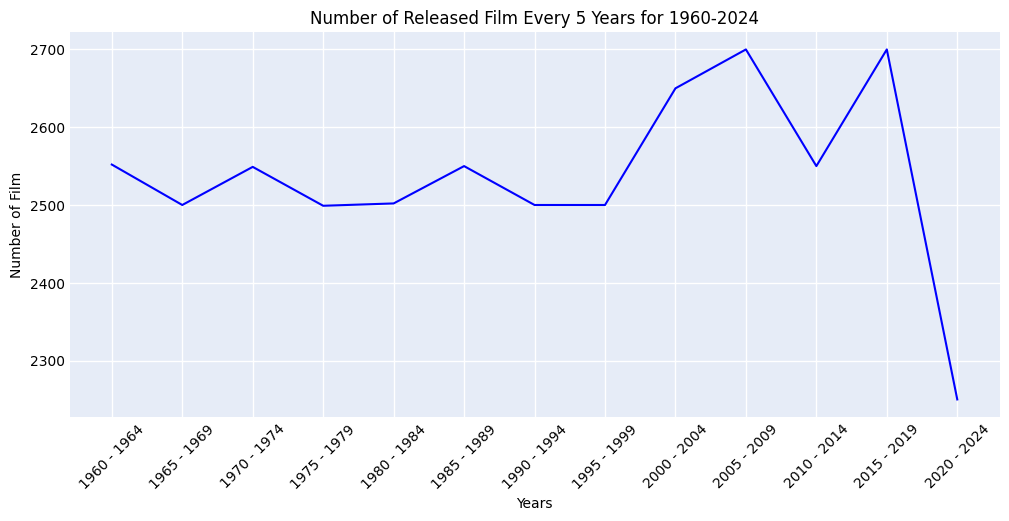

In [15]:
# Visualizing Bar Chart
num_film = df[['period', 'Title']].groupby('period').count()
num_film = num_film.drop('nan')

fig = plt.figure()
fig.set_figwidth(12)
fig.set_figheight(5)

# Plot
plt.plot(num_film.index, num_film['Title'], color='b')
plt.title("Number of Released Film Every 5 Years for 1960-2024")
plt.xlabel("Years")
plt.ylabel("Number of Film")
plt.xticks(rotation = 45)

# Style
plt.grid(color='white', linewidth=1)

ax = plt.gca()
ax.set_facecolor('#e6ecf7')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

In [16]:
# Change the duration film to minutes
def time_to_minutes(row):
    try:
        minutes = 0
        hours = 0
        if ('h' in row) & ('m' in row):
            parts = row.split("h ")
            hours = parts[0]
            minutes = parts[1].replace("m", "")
        elif ('h' in row):
            hours = row.replace("h", "")
        elif ('m' in row):
            minutes = row.replace("m", "")
        hours = int(hours)
        minutes = int(minutes)
        minutes += hours * 60
        return minutes
    except Exception as e:
        return pd.NA

df['duration(m)'] = df['Duration'].apply(time_to_minutes)
df['duration(m)'].head()

0    124
1    100
2    133
3    125
4    110
Name: duration(m), dtype: object

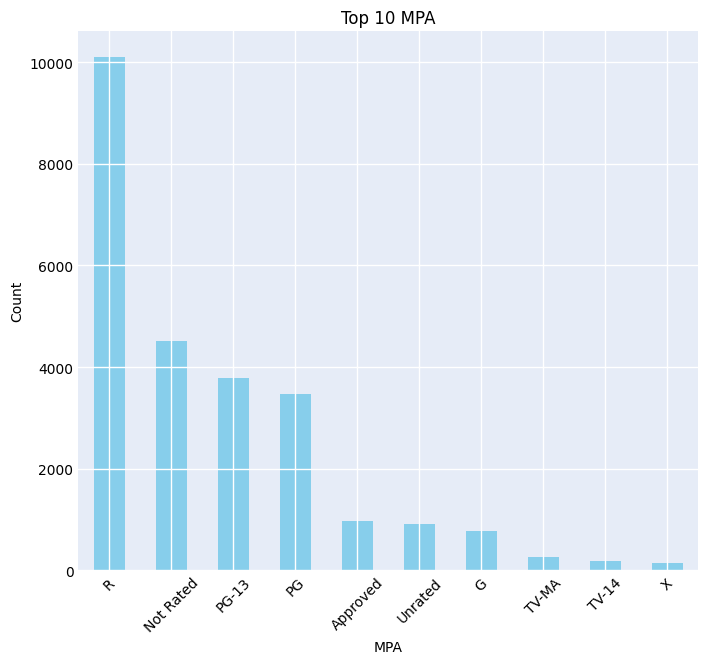

In [17]:
mpa_counts = df.MPA.value_counts()
top_n = 10
top_mpa_counts = mpa_counts.sort_values(ascending=False).head(10)

fig = plt.figure()
fig.set_figheight(7)
fig.set_figwidth(8)

top_mpa_counts.plot(kind='bar', color='skyblue')

plt.xlabel('MPA')
plt.ylabel('Count')
plt.title('Top 10 MPA')
plt.xticks(rotation=45)

plt.grid(color='white', linewidth=1)

ax = plt.gca()
ax.set_facecolor("#e6ecf7")
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis=u'both', which=u'both', length=0)

plt.show()

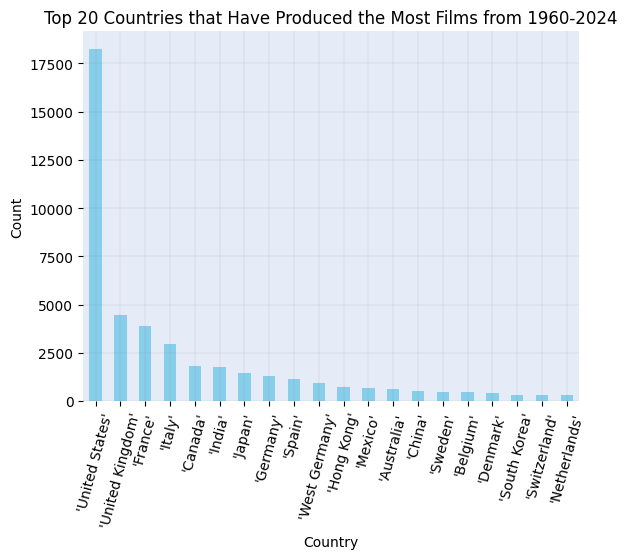

In [18]:
countries = df['countries_origin'].str.strip('[]').str.split(', ')
countries = countries.explode().value_counts()

top_countries = countries.head(20)

top_countries.plot(kind="bar", color="skyblue")

plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=75)
plt.title("Top 20 Countries that Have Produced the Most Films from 1960-2024")

plt.grid(color="grey", linewidth=0.1)
ax = plt.gca()
ax.set_facecolor("#e6ecf7")
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

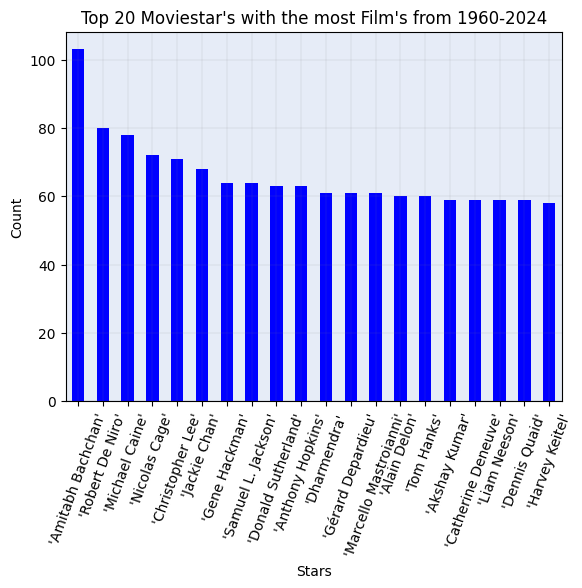

In [19]:
stars = df['stars'].str.strip('[]').str.split(', ')
top_stars = stars.explode().value_counts().head(20)

top_stars.plot(kind='bar', color='blue')

plt.title("Top 20 Moviestar's with the most Film's from 1960-2024")
plt.xlabel('Stars')
plt.ylabel('Count')
plt.xticks(rotation=70)

plt.grid(color="grey", linewidth=0.1)

plt.gca().set_facecolor('#e6ecf7')

plt.show()

In [20]:
df[['Title', 'Year', 'budget', 'grossWorldWide', 'nominations', 'oscars']].sort_values(by=['grossWorldWide', 'budget'], ascending=False).head(10)

,Title,Year,budget,grossWorldWide,nominations,oscars
21200,Avatar,2009,237000000.0,2.923706e+09,131,0
5650,Avengers: Endgame,2019,356000000.0,2.799439e+09,133,1
14001,Avatar: The Way of Water,2022,350000000.0,2.320250e+09,152,0
28950,Titanic,1997,200000000.0,2.264751e+09,83,0
22250,Star Wars: Episode VII - The Force Awakens,2015,245000000.0,2.071310e+09,140,5
30551,Avengers: Infinity War,2018,321000000.0,2.052415e+09,81,1
22750,Spider-Man: No Way Home,2021,200000000.0,1.952724e+09,71,1
8350,Inside Out 2,2024,200000000.0,1.698773e+09,63,0
22251,Jurassic World,2015,150000000.0,1.671537e+09,58,0
5651,The Lion King,2019,260000000.0,1.662021e+09,44,1


In [21]:
df[['Title', 'Year', 'budget', 'grossWorldWide', 'nominations', 'oscars']].sort_values(by=['budget', 'grossWorldWide'], ascending=False).head(10)

,Title,Year,budget,grossWorldWide,nominations,oscars
8597,Harbin,2024,3.000000e+11,15580789.0,0,0
30782,Along With the Gods: The Last 49 Days,2018,3.500000e+10,99066508.0,9,0
4012,My Way,2011,3.000000e+10,16653488.0,2,0
14228,Alienoid,2022,3.000000e+10,12109608.0,8,0
19685,The Name of the Rose,1986,3.000000e+10,7153487.0,6,0
20958,The Moon,2023,2.800000e+10,5175358.0,7,0
22908,Escape from Mogadishu,2021,2.400000e+10,29902716.0,20,0
30833,The Spy Gone North,2018,1.900000e+10,38844509.0,32,0
28980,Life Is Beautiful,1997,1.500000e+10,230099013.0,52,0
30836,The Great Battle,2018,1.500000e+10,41509280.0,5,0


# Desconectar o BD

In [4]:
conexao.close()

NameError: name 'conexao' is not defined